# Exercícios - Listas

In [1]:
# Imports utilizados em todos os exercícios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

### Questão 1 - Regressão Logística:

Utilizando da base de dados _iris.csv_, desenvolva um modelo de classificação com a Regressão Logística para a identificação das espécies da flor. Crie uma `classification_report` e uma matriz de confusão para os dados de teste.

In [12]:
# Carrega a base da iris
iris = pd.read_csv('iris.csv')

EDA - modelo de classificação

In [13]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

**Análise univariada**

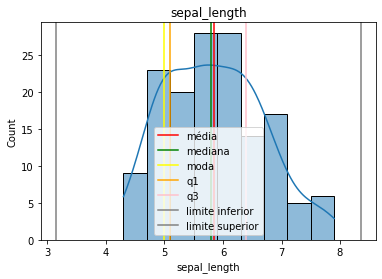

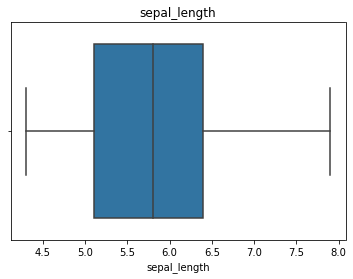

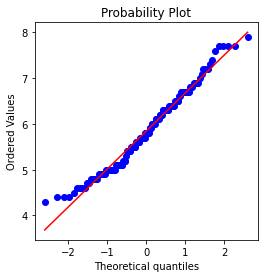

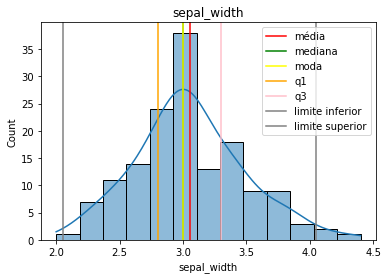

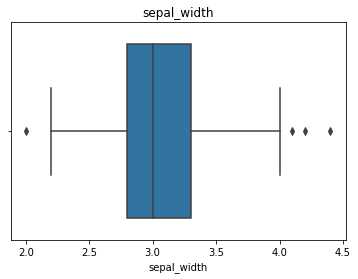

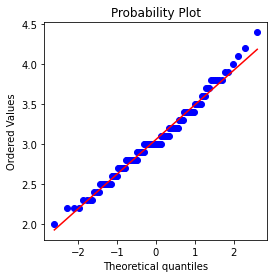

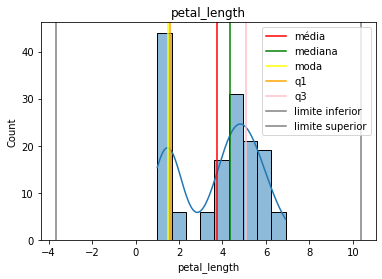

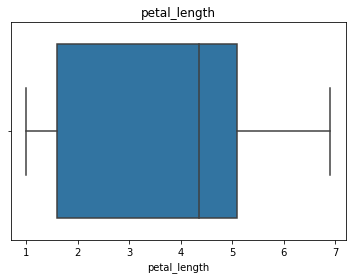

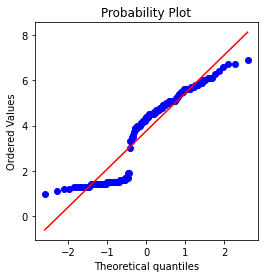

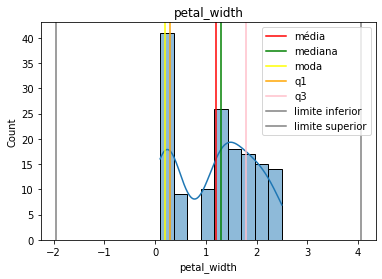

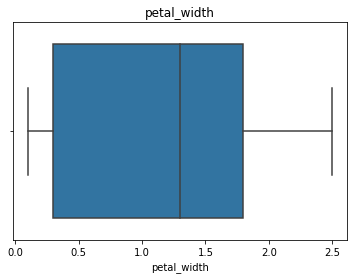

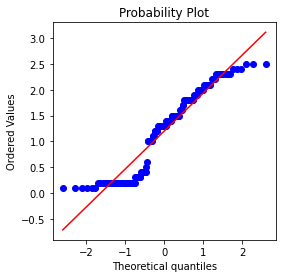

In [30]:
for item in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.histplot(iris[item], kde=True)
    # plotando média
    plt.axvline(x=iris[item].mean(), color="red", label="média")

    # plotando a mediana
    plt.axvline(iris[item].median(), color="green", label="mediana")

    # Loop para plotar as modas
    for i in range(iris[item].mode().shape[0]):
        plt.axvline(iris[item].mode()[i], color="yellow", label="moda")

    plt.axvline(iris[item].quantile(0.25), color="orange", label="q1")
    plt.axvline(iris[item].quantile(0.75), color="pink", label="q3")

    IQR = iris[item].quantile(0.75) - iris[item].quantile(0.25)
    plt.axvline(iris[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
    plt.axvline(iris[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

    plt.legend()

    plt.title(item)
    plt.show()
    plt.title(item)
    sns.boxplot(iris[item])
    plt.show()
    
    from scipy import stats
    fig, ax = plt.subplots(figsize=(4, 4))

    stats.probplot(iris[item], plot=ax)
    plt.show()
             

**Análise multivariada**

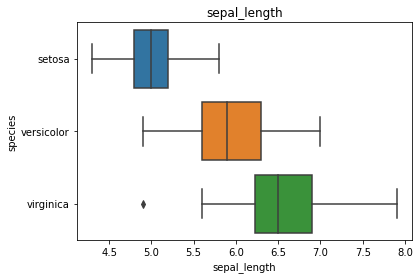

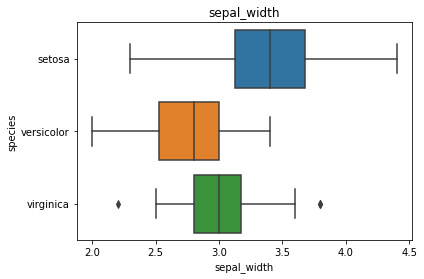

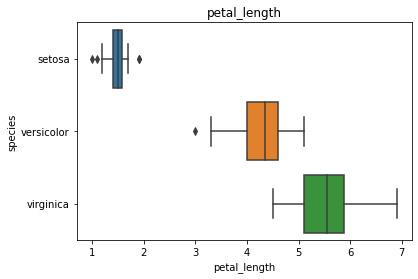

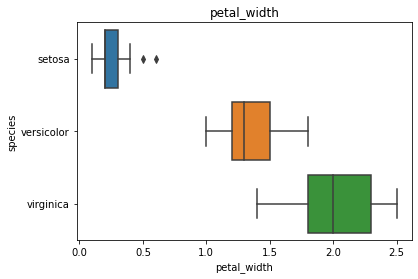

In [33]:
for item in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.boxplot(data=iris, x=item, y='species')
    plt.title(item)
    plt.show()

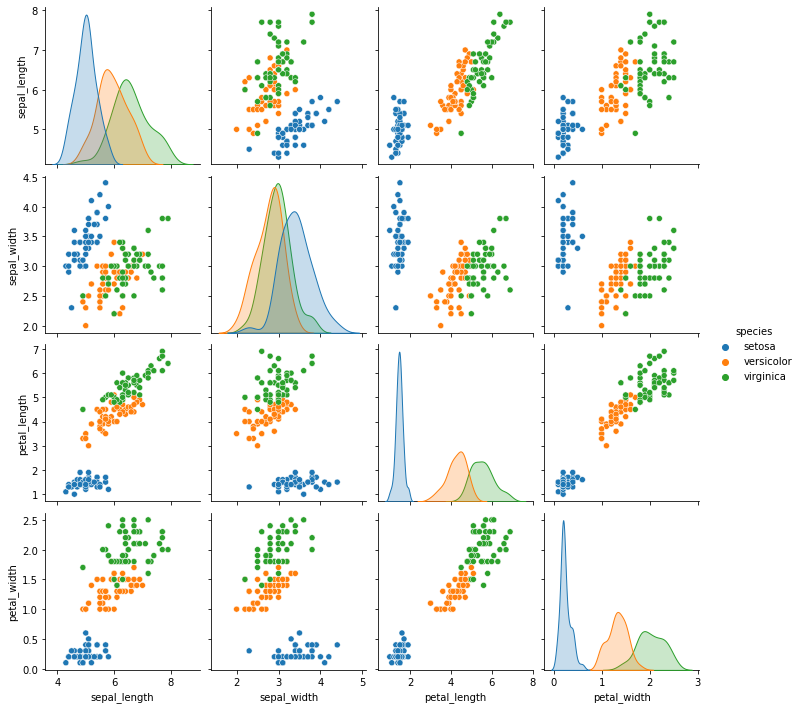

In [16]:
# Plot do pairplot
sns.pairplot(iris, hue='species')

# Mostra o gráfico
plt.show()

In [35]:
# espécie é categórica e por isso não vai aparecer no dataframe de correlações
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

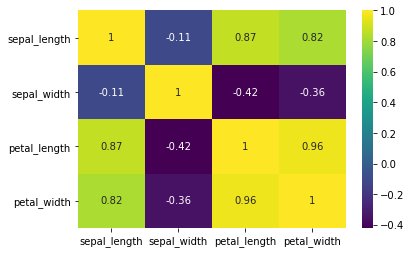

In [37]:
sns.heatmap(iris.corr(), annot=True, cmap='viridis')

**Modelo de Regressão Logística - Modelo de CLASSIFICAÇÃO**

In [38]:
# Remove a coluna species da base de features
X = iris.drop(['species'], axis = 1)

# Separa a target
y = iris['species']

In [41]:
display(X, y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [43]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #train_size=0.7

Para o modelo de regressão logística, não precisa normalizar/padronizar. Porém, a resposta final é a mesma se normalizada

In [45]:
# Define como será feito a normalização
scaler = StandardScaler()

In [46]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [47]:
display(X_train, X_train_std)

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


array([[-0.4134164 , -1.46440146, -0.10014569, -0.32149987],
       [ 0.55122187, -0.49582097,  0.71771076,  0.35364985],
       [ 0.67180165,  0.2306144 ,  0.95138404,  0.75873969],
       [ 0.91296121, -0.01153072,  0.30878254,  0.21861991],
       [ 1.63643991,  1.44134002,  1.30189395,  1.7039493 ],
       [-0.17225683, -0.25367584,  0.1919459 ,  0.08358997],
       [ 2.11875905, -0.01153072,  1.59398554,  1.16382952],
       [-0.29283662, -0.01153072,  0.36720086,  0.35364985],
       [-0.89573553,  1.19919489, -1.443767  , -1.40173942],
       [ 2.23933883, -0.49582097,  1.65240385,  1.02879957],
       [-0.05167705, -0.73796609,  0.13352758, -0.32149987],
       [-0.77515575,  0.95704977, -1.443767  , -1.40173942],
       [-1.01631531,  1.19919489, -1.50218532, -1.26670948],
       [-0.89573553,  1.92563026, -1.15167541, -1.13167953],
       [-1.01631531, -2.43298195, -0.21698232, -0.32149987],
       [ 0.55122187, -0.73796609,  0.60087413,  0.75873969],
       [-1.25747488,  0.

In [48]:
# Instanciando o modelo
model = LogisticRegression()

In [49]:
# Fit do Modelo, ajustar o modelo
model.fit(X_train, y_train) # o modelo está treinado

LogisticRegression()

Bonus: <br>
Se for usar o modelo para outras bases, a gente salva o modelo e depois carrega.   
libs: Pickle e Joblib

In [51]:
# Predições para a base de teste
y_pred = model.predict(X_test)
y_proba =  model.predict_proba(X_test)

In [52]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [53]:
y_proba

array([[4.08122466e-03, 8.12024103e-01, 1.83894673e-01],
       [9.42611545e-01, 5.73878802e-02, 5.74443417e-07],
       [1.53880887e-08, 2.09326321e-03, 9.97906721e-01],
       [6.75592388e-03, 7.73287346e-01, 2.19956730e-01],
       [1.58156605e-03, 7.51002514e-01, 2.47415920e-01],
       [9.50802759e-01, 4.91967884e-02, 4.52496467e-07],
       [7.75943593e-02, 9.04346488e-01, 1.80591522e-02],
       [1.75243713e-04, 1.47883607e-01, 8.51941149e-01],
       [2.42018691e-03, 7.80183979e-01, 2.17395834e-01],
       [2.90106482e-02, 9.40763088e-01, 3.02262637e-02],
       [4.62544053e-04, 2.25748825e-01, 7.73788631e-01],
       [9.63648286e-01, 3.63515341e-02, 1.80143789e-07],
       [9.69740160e-01, 3.02597447e-02, 9.50418908e-08],
       [9.57055618e-01, 4.29441222e-02, 2.60064173e-07],
       [9.76803433e-01, 2.31963793e-02, 1.87414458e-07],
       [4.68396196e-03, 6.63699907e-01, 3.31616131e-01],
       [9.41122221e-06, 2.67859158e-02, 9.73204673e-01],
       [2.78159456e-02, 9.44973

**Avaliação do modelo**

In [54]:
# Classification Report dos Resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Probabilidade 1.0, significa que acertou tudo. Acurácia de 100%

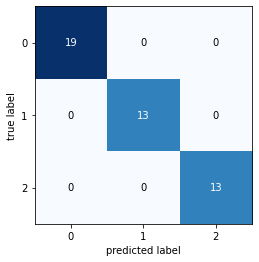

In [55]:
# Define a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Cria o plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o gráfico
plt.show()

A qualidade do resultado na Iris é excelente (na vida real, desconfie) e isso se deve a separação entre as classes da Iris serem bem definidas, conforme visto no `pairplot`.

### Questão 4 - Forecasting Séries Temporais:

Com o _dataset_ `covid_saopaulo.csv`, treine um modelo SARIMA com 90% dos dados e faça predições para avaliar o desempenho do modelo.

__Dica.:__ utilize a biblioteca `auto_arima` para fazer as iterações dos parâmetros do modelo SARIMA:
        
```python
! pip install pmdarima
from pmdarima import auto_arima

```

In [63]:
# Instalando a Lib do auto_arima
! pip install pmdarima

# conda install -c conda-forge pmdarima

In [2]:
# Carrega as principais libs para esse exercício
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

**EDA**

In [12]:
# Carrega o dataset
covidSP = pd.read_csv('covid_saopaulo.csv', index_col='date', parse_dates=True)

# Acerta o index como range de datas
idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')

# Reindex do dataset
covidSP = covidSP.reindex(idx)

# Preenche os valores nulos
covidSP.fillna(0,inplace=True)

<AxesSubplot:>

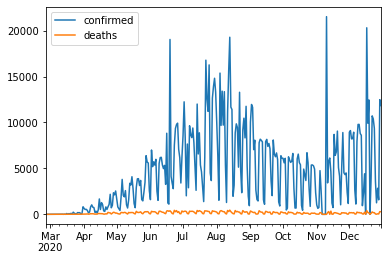

In [14]:
covidSP.plot()

Obs.: colocar título, cores, criar linhas horizontais, linhas verticais

<AxesSubplot:>

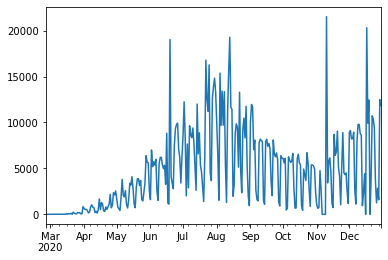

In [15]:
covidSP['confirmed'].plot()

<AxesSubplot:>

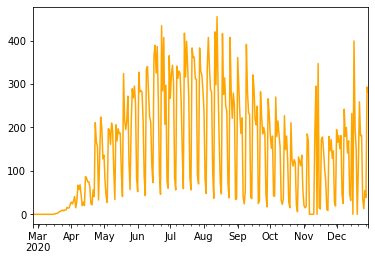

In [17]:
covidSP['deaths'].plot(color='orange')

**MODELO**

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [18]:
# Ajuste de modelo SARIMA utilizando o auto_arima (não precisamos criar várias combinações para determinar os parâmetros)
# Vai utilizar um metodo iterativo análogo do exercício das aulas

# Define o auto_arima
auto_arima(covidSP['deaths'], seasonal=True, m=7).summary()

# Fit do auto_arima
stepwise_fit = auto_arima(covidSP['deaths'],
                          start_p=0,
                          start_q=0,
                          max_p=6,
                          max_q=3,
                          m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

# Resultado
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3579.716, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3825.903, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3563.494, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3581.821, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3823.921, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3808.539, Time=0.13 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3519.108, Time=0.88 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3488.255, Time=1.37 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3486.546, Time=0.77 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3683.983, Time=0.27 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3488.166, Time=1.50 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3635.827, Time=0.55 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.48 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3454.120, Time=1.92 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  309
Model:             SARIMAX(6, 1, 0)x(2, 0, [1, 2], 7)   Log Likelihood               -1680.010
Date:                                Fri, 19 Nov 2021   AIC                           3382.020
Time:                                        21:24:27   BIC                           3423.052
Sample:                                             0   HQIC                          3398.427
                                                - 309                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9605      0.039    -24.590      0.000      -1.037      -0.884
ar.L2         -0.9164      0.067    -13.686      0.000      -1.048      -0.785
ar.L3         -0.8041      0.078    -10.354      0.000      -0.956      -0.652
ar.L4         -0.7708      0.100     -7.744      0.000      -0.966      -0.576
ar.L5         -0.7482      0.090     -8.350      0.000      -0.924      -0.573
ar.L6         -0.5764      0.099     -5.827      0.000      -0.770      -0.383
ar.S.L7        1.2306      0.142      8.657      0.000       0.952       1.509
ar.S.L14      -0.2802      0.131     -2.142      0.032      -0.537      -0.024
ma.S.L7       -1.5240      0.101    -15.028      0.000      -1.723      -1.325
ma.S.L14       0.7191      0.090      8.032      0.000       0.544       0.895
sigma2      3157.2675    171.584     18.401      0.000    2820.969    3493.566
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               396.91
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Vamos separar a base em treino e teste, dado que já temos a melhor combinação de parâmetros para o SARIMA:

In [19]:
# Tamanho da base
len(covidSP)

309

In [20]:
# Atribuir 90% de treino
len(covidSP)*0.9

278.1

In [22]:
# Separando em treino e teste
train = covidSP.iloc[:278]
test = covidSP.iloc[278:]

Treinando o modelo

In [23]:
# Preparando o modelo SARIMAX
modelo = SARIMAX(train['deaths'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 7))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            deaths   No. Observations:                  278
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1504.094
Date:                           Fri, 19 Nov 2021   AIC                           3016.188
Time:                                   21:29:05   BIC                           3030.684
Sample:                               02-26-2020   HQIC                          3022.004
                                    - 11-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9181      0.024    -38.832      0.000      -0.964      -0.872
ar.S.L7        0.9652      0.018     54.000      0.000       0.930       1.000
ma.S.L7       -0.6308      0.052    -12.188      0.000      -0.732      -0.529
sigma2      2935.5015    135.109     21.727      0.000    2670.693    3200.310
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               544.32
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Previsões

In [25]:
# Obtendo as predições
inicio = len(train)
fim = len(train) + len(test) - 1

predicts = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(0,1,1)(1,0,1,7) ')

predicts.index = test.index

In [27]:
train

,confirmed,deaths
2020-02-26,0.0,0.0
2020-02-27,0.0,0.0
2020-02-28,1.0,0.0
2020-02-29,0.0,0.0
2020-03-01,0.0,0.0
...,...,...
2020-11-25,8900.0,146.0
2020-11-26,4523.0,172.0
2020-11-27,4320.0,129.0
2020-11-28,4507.0,146.0


In [28]:
test

,confirmed,deaths
2020-11-30,1180.0,19.0
2020-12-01,8937.0,195.0
2020-12-02,9114.0,166.0
2020-12-03,8208.0,181.0
2020-12-04,8237.0,151.0
2020-12-05,8938.0,181.0
2020-12-06,2675.0,46.0
2020-12-07,1116.0,25.0
2020-12-08,7923.0,242.0
2020-12-09,9784.0,179.0


In [26]:
# Visualiza as predições
predicts

2020-11-30     20.604081
2020-12-01    133.815139
2020-12-02    162.274264
2020-12-03    173.645362
2020-12-04     98.627041
2020-12-05    138.719261
2020-12-06     28.732937
2020-12-07     24.063289
2020-12-08    133.331038
2020-12-09    160.798889
2020-12-10    171.773915
2020-12-11     99.368593
2020-12-12    138.064341
2020-12-13     31.909005
2020-12-14     27.402008
2020-12-15    132.863798
2020-12-16    159.374903
2020-12-17    169.967653
2020-12-18    100.084316
2020-12-19    137.432234
2020-12-20     34.974446
2020-12-21     30.624434
2020-12-22    132.412834
2020-12-23    158.000517
2020-12-24    168.224306
2020-12-25    100.775110
2020-12-26    136.822144
2020-12-27     37.933113
2020-12-28     33.734619
2020-12-29    131.977577
2020-12-30    156.674003
Freq: D, Name: Previsões SARIMA(0,1,1)(1,0,1,7) , dtype: float64

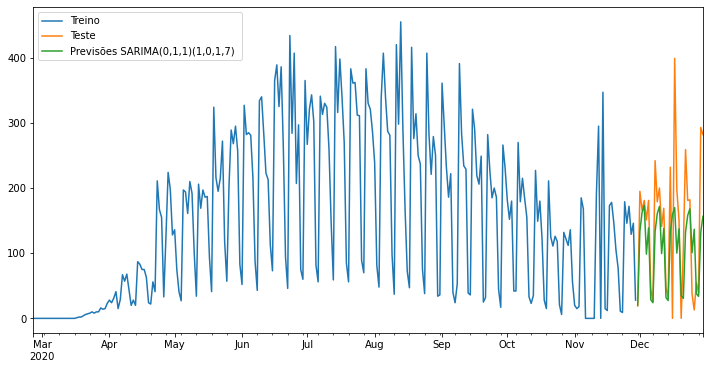

In [29]:
# Plot dos dados de treino, teste e predições
train['deaths'].plot(legend=True, label='Treino')
test['deaths'].plot(legend=True, label='Teste')
predicts.plot(legend=True, figsize=(12,6))

# Mostra o gráfico
plt.show()

### Questão 5 - Regressão Linear

No _dataset_ `Admission_Predict.csv`, temos dados sobre alunos indianos que desejam ingressar em uma universidade. Entre as variáveis existem estão diversas métricas de desempenho dos alunos. Utilizando a variável resposta "Chance de Admissão" (Chance of admit ), crie um modelo de regressão linear para esses dados.

**EDA**

In [32]:
# Carrega a base de dados
admit = pd.read_csv('Admission_Predict.csv', index_col = 'Serial No.')

In [33]:
admit

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [34]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [35]:
admit.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [36]:
# Verifica os valores nulos
admit.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [37]:
# Verifica a dimensão dos dados
admit.shape

(400, 8)

In [41]:
admit.columns.tolist()

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

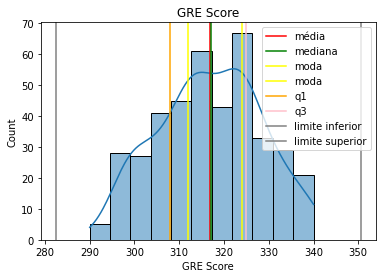

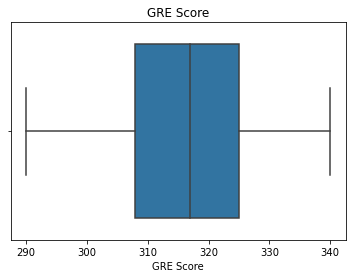

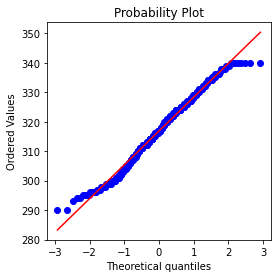

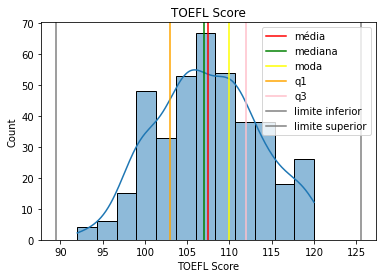

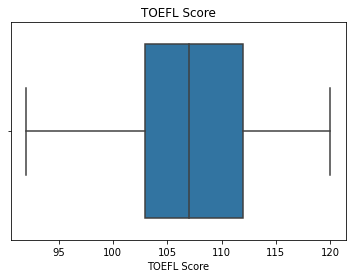

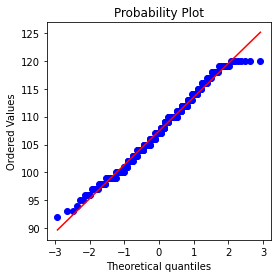

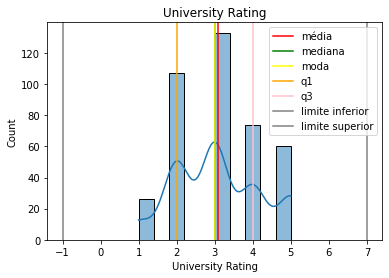

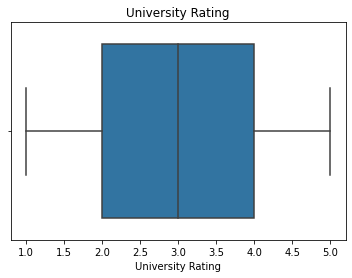

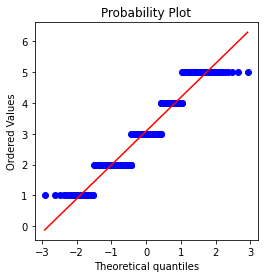

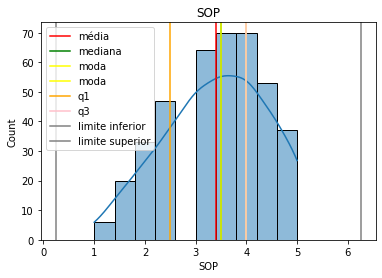

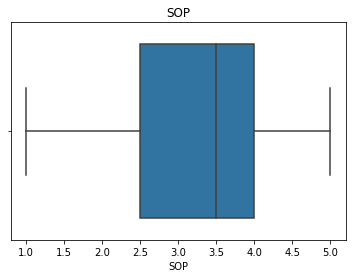

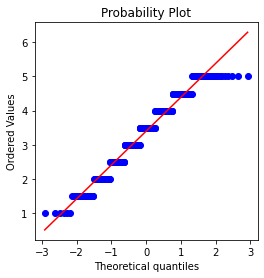

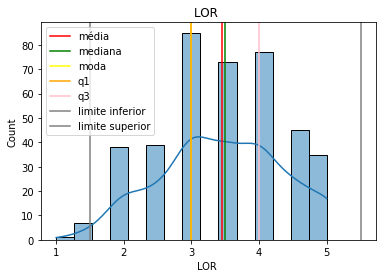

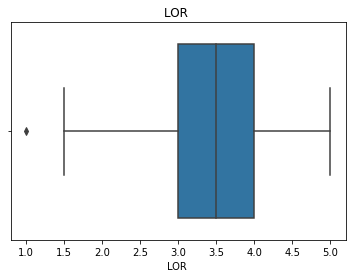

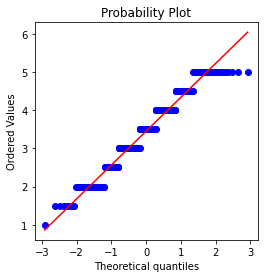

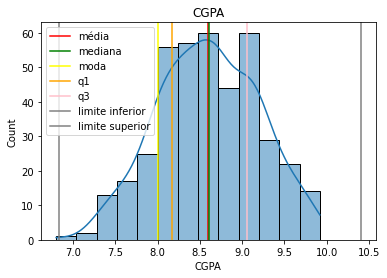

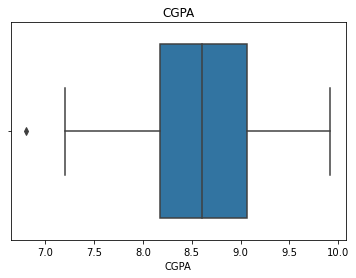

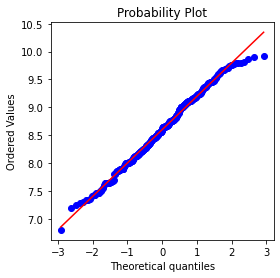

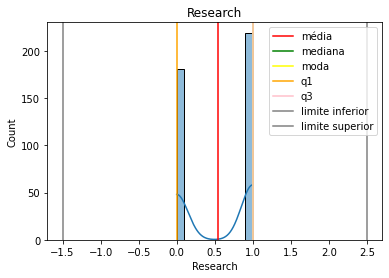

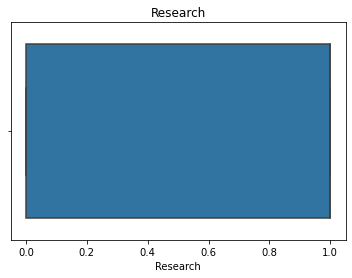

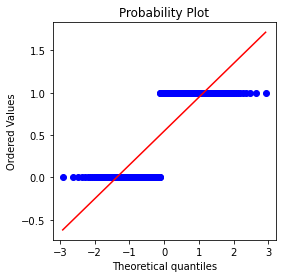

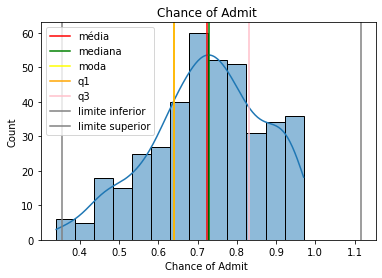

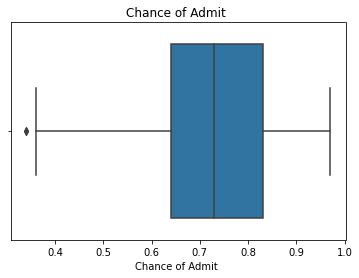

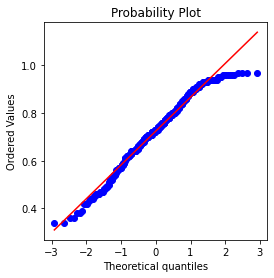

In [46]:
for item in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']:
    sns.histplot(admit[item], kde=True)
    # plotando média
    plt.axvline(x=admit[item].mean(), color="red", label="média")

    # plotando a mediana
    plt.axvline(admit[item].median(), color="green", label="mediana")

    # Loop para plotar as modas
    for i in range(admit[item].mode().shape[0]):
        plt.axvline(admit[item].mode()[i], color="yellow", label="moda")

    plt.axvline(admit[item].quantile(0.25), color="orange", label="q1")
    plt.axvline(admit[item].quantile(0.75), color="pink", label="q3")

    IQR = admit[item].quantile(0.75) - admit[item].quantile(0.25)
    plt.axvline(admit[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
    plt.axvline(admit[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

    plt.legend()

    plt.title(item)
    plt.show()
    plt.title(item)
    sns.boxplot(admit[item])
    plt.show()
    
    from scipy import stats
    fig, ax = plt.subplots(figsize=(4, 4))

    stats.probplot(admit[item], plot=ax)
    plt.show()
             

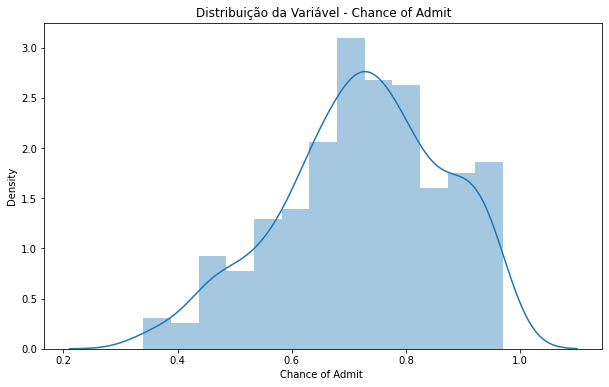

In [47]:
# Dimensiona a figura do gráfico
plt.figure(figsize=(10,6))

# Plot da distribuição da variavel resposta
sns.distplot(admit["Chance of Admit "], kde=True)

# Cria um titulo
plt.title('Distribuição da Variável - Chance of Admit')

# Mostra o gráfico
plt.show()

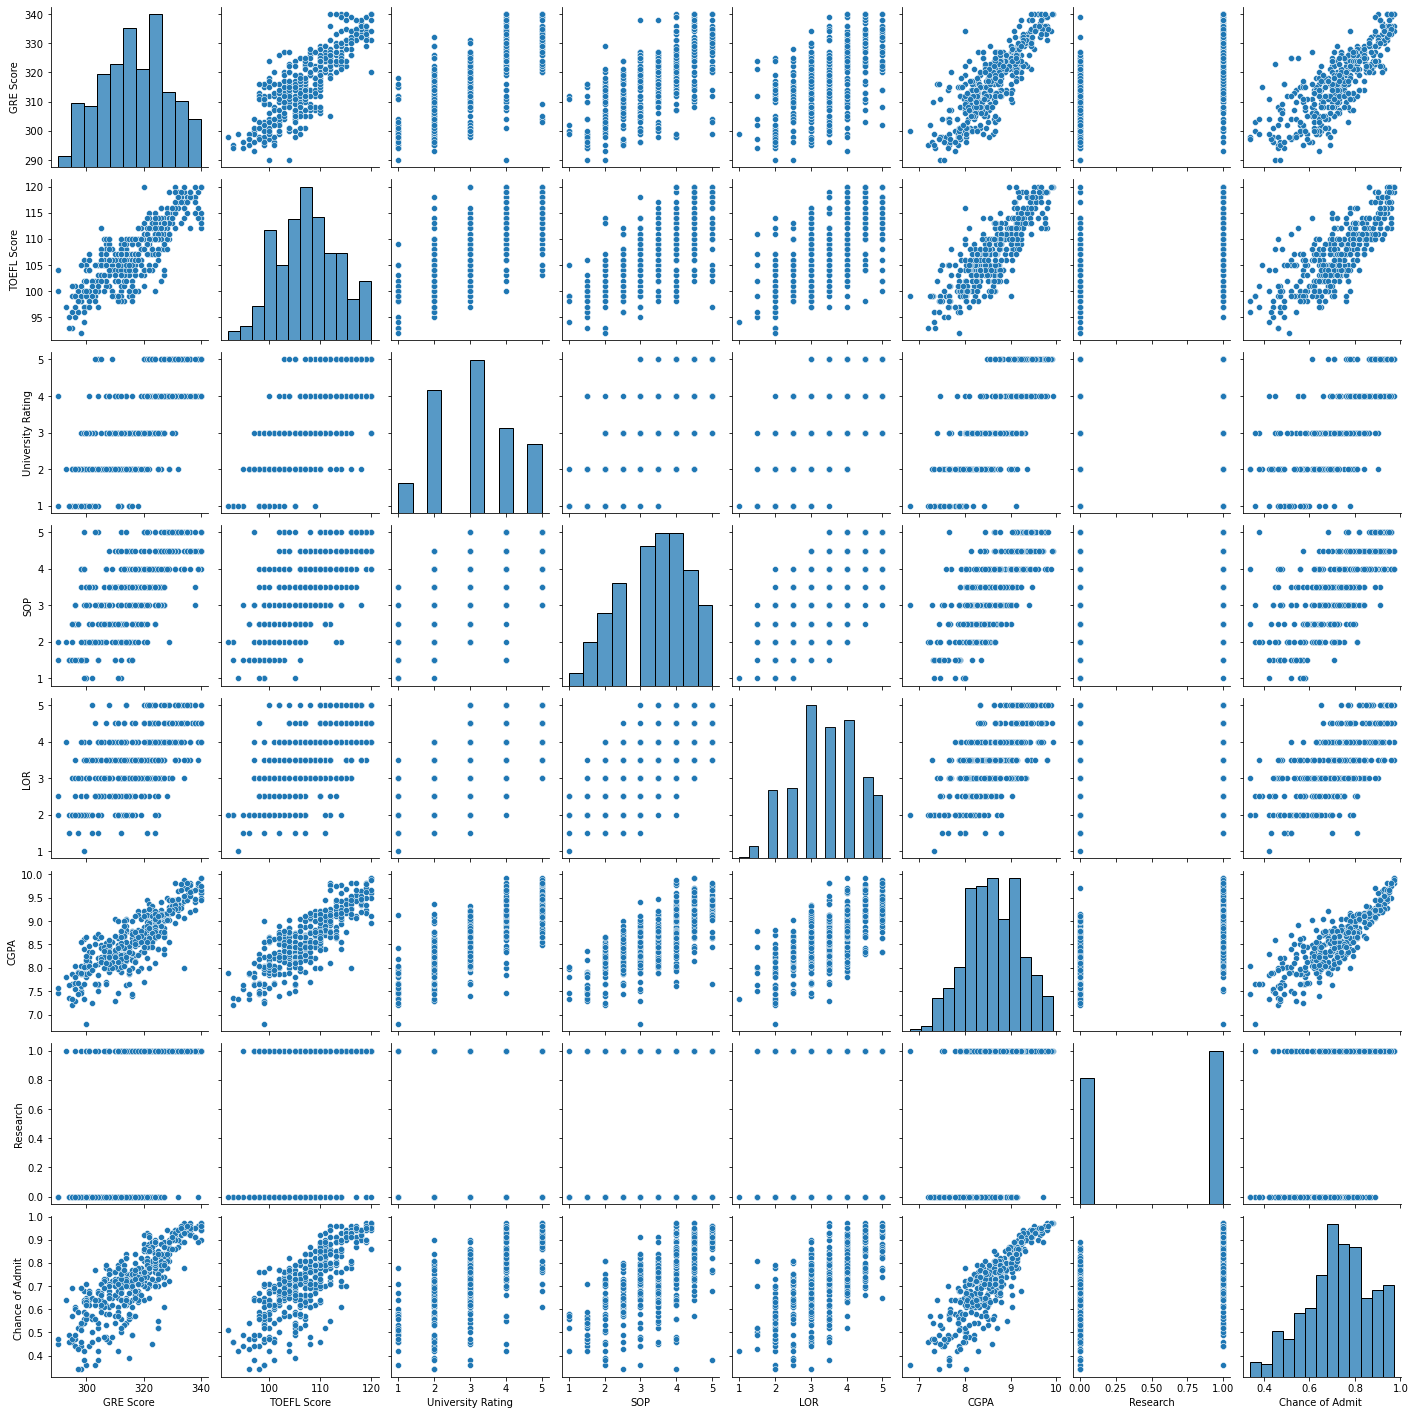

In [48]:
# Pairplot das Variáveis
sns.pairplot(admit)

# Mostrao gráfico
plt.show()

In [49]:
admit.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

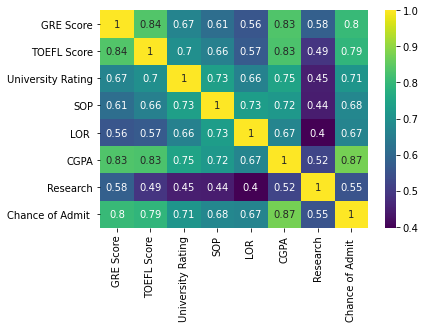

In [50]:
sns.heatmap(admit.corr(), annot=True, cmap='viridis')

**MODELO**

In [51]:
# Speração dos dados entre variáveis e resposta
X = admit.drop(['Chance of Admit '], axis = 1)
y = admit['Chance of Admit ']

In [52]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

Opcional: normalização/padronização

In [53]:
# Define como será feito a normalização
scaler = StandardScaler()

In [54]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [57]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [58]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [59]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [60]:
# Visualizando as predições
y_pred

array([0.64734197, 0.72165881, 0.93540267, 0.82079041, 0.57781233,
       0.9282453 , 0.52898217, 0.54049852, 0.6642913 , 0.84453894,
       0.72491972, 0.91192259, 0.55014279, 0.88795065, 0.70151728,
       0.69045265, 0.66999264, 0.48163309, 0.69099994, 0.97632508,
       0.59207825, 0.65665649, 0.71377809, 0.53497985, 0.95093543,
       0.810305  , 0.69409622, 0.56684368, 0.67946535, 0.81457938,
       0.81022743, 0.94667098, 0.64560622, 0.51450621, 0.66361741,
       0.67144094, 0.7235074 , 0.6480692 , 0.61989951, 0.88414197,
       0.74108467, 0.59701292, 0.77704183, 0.96177165, 0.84899462,
       0.83589569, 0.95175439, 0.65471687, 0.92257385, 0.85934346,
       0.89351388, 0.72601699, 0.78377786, 0.95276909, 0.57555615,
       0.59192473, 0.69115154, 0.84305695, 0.60189253, 0.84517226,
       0.66665763, 0.65574046, 0.7006315 , 0.50851903, 0.63275593,
       0.71371096, 0.61905871, 0.84500458, 0.85769092, 0.79819613,
       0.72154137, 0.82117028, 0.87634528, 0.83168876, 0.52556

**AVALIAR**

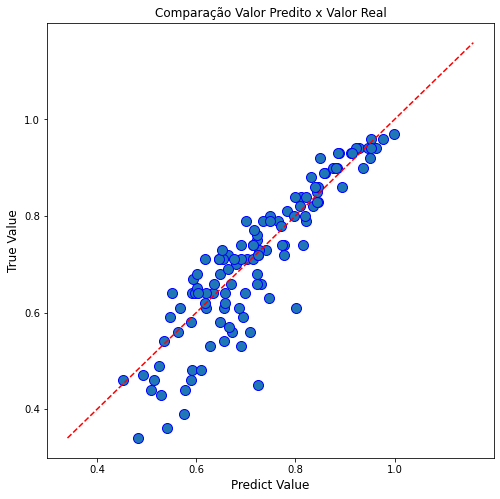

In [61]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [62]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.049
Erro Quadrãtico Médio:  0.005
R^2:                    0.796


Se eu normalizei(ou padronizei) os dados, podemos fazer o feature importance

In [63]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(10)

,Features,Scores
0,CGPA,0.069904
1,GRE Score,0.020870
2,TOEFL Score,0.019058
3,LOR,0.012549
4,Research,0.009151
5,University Rating,0.005591
6,SOP,0.001019


### E se tratarmos os dados (outliers)

Considerando o CGPA com outliers

In [76]:
admit['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

In [80]:
var = 'CGPA'

IQR = admit[var].quantile(0.75) - admit[var].quantile(0.25)
li = admit[var].quantile(0.25) - 1.5*IQR
li

6.83125

Imaginando que valores abaixo de li são descartados

In [81]:
admit[admit[var]< li] # esse cara é outlier

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
59,300,99,1,3.0,2.0,6.8,1,0.36


In [83]:
df = admit[admit[var]>li]

In [84]:
# Speração dos dados entre variáveis e resposta
X = df.drop(['Chance of Admit '], axis = 1)
y = df['Chance of Admit ']

In [85]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [86]:
# Define como será feito a normalização
scaler = StandardScaler()

In [87]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [88]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [89]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [91]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [92]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.053
Erro Quadrãtico Médio:  0.005
R^2:                    0.739


R2 sem outlier:

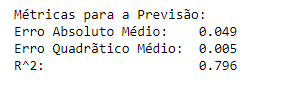